<a href="https://colab.research.google.com/github/audrey-nakate/bank_marketing_analysis/blob/main/audrey_bank_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Link to Dataset Used - https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset/discussion/361812

http://archive.ics.uci.edu/dataset/222/bank+marketing

# Data Import and Overview

In [ ]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# importing dataset
bank_data = pd.read_csv('/content/drive/MyDrive/ml_data/bank_marketing/bank_marketing_data.csv', sep=';')
# preview of the dataset
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# Data Preparation and Transformation

## Renaming Columns for Clarity

In [ ]:
# renaming columns for better understanding
col_rename = {'marital':'marital_status',
              'education': 'education_level',
              'default': 'credit_in_default',
              'housing':'housing_loan',
              'loan':'personal_loan',
              'contact':'communication_type',
              'duration': 'last_contact_duration',
              'campaign': 'campaign_contacts_no',
              'previous':'previous_contacts_no',
              'y':'target'}

bank_data.rename(col_rename, axis=1, inplace=True)
#confirming the changes
bank_data.head()

,age,job,marital_status,education_level,credit_in_default,housing_loan,personal_loan,communication_type,month,day_of_week,...,campaign_contacts_no,pdays,previous_contacts_no,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Dealing With Null Values

In [ ]:
# replacing values labelled as unknown with NULL
bank_data.replace(to_replace='unknown', value=np.nan, inplace=True)
bank_data.isnull().sum()
# replace marital status with most common
# replace education with unknown
# delete those in job, default, housing and loan

,0
age,0
job,330
marital_status,80
education_level,1731
credit_in_default,8597
housing_loan,990
personal_loan,990
communication_type,0
month,0
day_of_week,0


In [ ]:
# since the data is a lot, I'm dropping the rows with null values in the job, education and default fields
bank_data.dropna(subset = ['job', 'credit_in_default', 'housing_loan', 'personal_loan'], inplace=True)
bank_data.isnull().sum()

,0
age,0
job,0
marital_status,61
education_level,1104
credit_in_default,0
housing_loan,0
personal_loan,0
communication_type,0
month,0
day_of_week,0


In [ ]:
# replacing marital_status null with most common value
# mode returns a series, thus adding [0] allows you to choose a single value, in this case the top most value in the series.
bank_data['marital_status'] = bank_data['marital_status'].fillna(value=bank_data['marital_status'].mode()[0])
bank_data['marital_status'].isnull().sum()

np.int64(0)

In [ ]:
# replacing education_level null with unknown
bank_data['education_level'] = bank_data['education_level'].fillna(value='unknown')
bank_data['education_level'].isnull().sum()

np.int64(0)

In [ ]:
bank_data.isnull().sum()

,0
age,0
job,0
marital_status,0
education_level,0
credit_in_default,0
housing_loan,0
personal_loan,0
communication_type,0
month,0
day_of_week,0


## Checking and Fixing Column Datatypes

In [ ]:
bank_data.head()

,age,job,marital_status,education_level,credit_in_default,housing_loan,personal_loan,communication_type,month,day_of_week,...,campaign_contacts_no,pdays,previous_contacts_no,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
bank_data.dtypes

,0
age,int64
job,object
marital_status,object
education_level,object
credit_in_default,object
housing_loan,object
personal_loan,object
communication_type,object
month,object
day_of_week,object


All columns are of the right datatype

## Checking for Inconsistencies in Categorical Columns

In [ ]:
bank_data.columns
# categorising all columns in lists based on dtype
cat_cols = ['job', 'marital_status', 'education_level','credit_in_default', 'housing_loan', 'personal_loan', 'communication_type', 'month', 'day_of_week', 'poutcome', 'target']
num_cols = ['age', 'last_contact_duration', 'campaign_contacts_no', 'pdays', 'previous_contacts_no', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# cheking values in categorical columns for insconsistencies
for col in cat_cols:
  print(col, '\n', bank_data[col].unique())
  print('-'*60)

job 
 ['housemaid' 'services' 'admin.' 'technician' 'blue-collar' 'unemployed'
 'retired' 'management' 'entrepreneur' 'student' 'self-employed']
------------------------------------------------------------
marital_status 
 ['married' 'single' 'divorced']
------------------------------------------------------------
education_level 
 ['basic.4y' 'high.school' 'basic.6y' 'professional.course' 'basic.9y'
 'university.degree' 'unknown' 'illiterate']
------------------------------------------------------------
credit_in_default 
 ['no' 'yes']
------------------------------------------------------------
housing_loan 
 ['no' 'yes']
------------------------------------------------------------
personal_loan 
 ['no' 'yes']
------------------------------------------------------------
communication_type 
 ['telephone' 'cellular']
------------------------------------------------------------
month 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
----------------------------------------

No categorical inconsistencies found

## Checking for Duplicate Values

In [ ]:
bank_data.duplicated().sum()

np.int64(11)

In [ ]:
# dropping the 11 duplicates
bank_data.drop_duplicates(inplace=True)
bank_data.duplicated().sum()

np.int64(0)

In [ ]:
# Overview of data before exploratory data analysis
bank_data.head()

,age,job,marital_status,education_level,credit_in_default,housing_loan,personal_loan,communication_type,month,day_of_week,...,campaign_contacts_no,pdays,previous_contacts_no,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Patterns and Insights in the Data

In [ ]:
bank_data[num_cols].describe()

,age,last_contact_duration,campaign_contacts_no,pdays,previous_contacts_no,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,31640.000000,31640.000000,31640.000000,31640.000000,31640.000000,31640.000000,31640.000000,31640.000000,31640.000000,31640.000000
mean,39.118331,260.049874,2.519753,955.063970,0.198357,-0.081198,93.524253,-40.577965,3.448185,5160.104845
std,10.462250,261.324828,2.711910,204.201067,0.531243,1.615259,0.587339,4.802321,1.782624,75.684095
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.313000,5099.100000
50%,37.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.856000,5191.000000
75%,46.000000,322.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,95.000000,4918.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


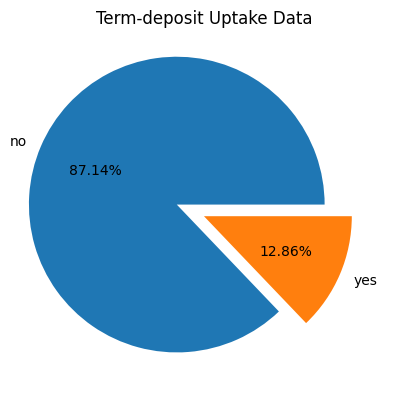

In [ ]:
# Distribution of target variable - how many people said yes, or no
target_counts = bank_data['target'].value_counts()
plt.pie(target_counts, labels=target_counts.index, autopct='%0.2f%%', explode=[0.2, 0])
plt.title('Term-deposit Uptake Data')
plt.show();

# Majority of the replies are no. we want to focus and find out why those who said yes, said yes,
# and how can we increase the number of people who said yes

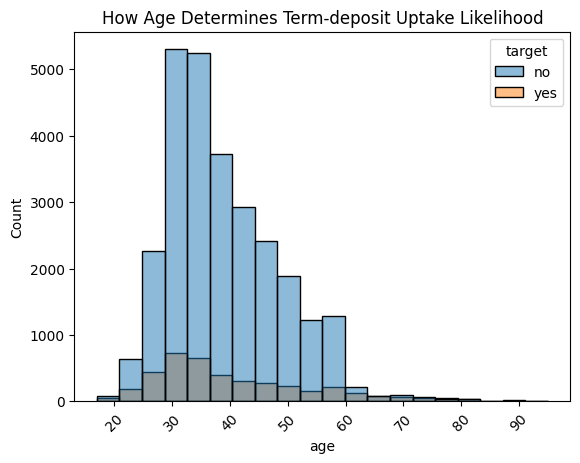

In [ ]:
# histogram showing most subscribed age group
fig, ax = plt.subplots()
ax = sns.histplot(data=bank_data, x='age', bins=20, hue='target')
ax.tick_params(axis='x', rotation = 45)
ax.set_title('How Age Determines Term-deposit Uptake Likelihood');

# Is age really a determinant of whether one is likely to take up the term deposit? The data is really biased towards no values.

**consider**

**univariate**

histogram - numerical features

boxplot - numerical features

barplot - categorical features

countplot - categorical features

TO-DO
1.   Change all values labelled unknown to null - **done**
2.   Categorize the notebook so you know what you're doing where - **done**
3.   Think more about whether you should delete the fields marked as unknown, on categorical basis. Currently think I should keep it. cause there *will* be people where the status is unknown - **dropped for some, left for others**
4.   Think of how you'll separate the education value esp those that say basic.4y, high.school, professional.course - **uneeded as it is intentional**
5.   Consider dropping duration column as it greatly affects the output variable. Might lead to overfitting.


I *may* have to find a solution to the imbalance, either through oversampling of the minority class or undersampling of the majority class

Try training as is, and see if rebalancing is even necessary.

Do you balance before or after analysis?

How to make sure that both classes are properly represented during analysis?

Will changing the distribution of my target variable negatively affect my model performance? i.e. Will it be considered a misrepresentation of what actually happens in real life?

weighing? sampling techniques? adjusting probability threshold?

checking how github and colab merge to save my changes